# <u>**HARSHITA NAUHWAR**
nauhwarharshita.1502@gmail.com <br>
https://www.linkedin.com/in/harshita-nauhwar-059411203

# **PROBLEM STATEMENT:**

Objective: Evaluate the candidate’s skills in data analysis, machine learning application, and effective communication of findings.

Task Description:

1. Data Analysis:

- Given a dataset on email engagement (including open rates, click-through rates, and conversion rates), perform an exploratory data analysis.
- Identify potential key patterns and insights, using statistical and visualization techniques.

2. Model Development:

- Develop a machine learning model to predict the likelihood of email engagement (open rates or link clicks) based on the features available in the dataset.
- Document the model development process, including data preprocessing, feature engineering, model selection, training, and validation in a Jupyter notebook.

3. Insights and Reporting:

- Analyze the model’s performance and interpret its predictions
- Draft a report summarizing the analysis approach, model development process, key findings, and actionable insights for improving email engagement.

4. Collaboration Simulation:

- Submit the Jupyter notebook and report as a pull request in a simulated version control environment. The pull request description should clearly articulate the changes and their rationale.

Deliverables:

* A Jupyter notebook with detailed analysis and model development code.
* A concise report summarizing methodology, findings, and recommendations.

Time Frame: 2.5 hours.

Evaluation Criteria:

* Proficiency in analyzing datasets and deriving meaningful insights.
* Technical ability in developing and evaluating machine learning models.
* Effectiveness in communicating technical information and business insights.
* Familiarity with version control systems and collaborative project workflows.



---



## 1.1 Importing Required Libraries


In [2]:
from google.colab import files
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from textblob import TextBlob
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


## 1.2 Dataset Conversion
Creating a DataFrame with columns corresponding to the keys in the dictionaries inside the 'example1' list in the dataset overall.

In [3]:
# Uploading the .pkl filei
uploaded = files.upload()

Saving email_campaigns.pkl to email_campaigns.pkl


In [4]:
file_name = 'email_campaigns.pkl'

# import pandas as pd

data = pd.read_pickle("/content/email_campaigns.pkl")

# # Opening the file in binary mode to load the data
# with open(file_name, 'rb') as file:
#     data = pickle.load(file)

In [5]:
print(data)

[{'example1': [{'subject': '🚀 Propel Your Marketing ROI with Advanced Analytics!', 'body': "Hey [Recipient's Name],\n\nReady to see your marketing performance soar? With our cutting-edge Marketing Analytics services, your business can harness the power of data to drive decision-making and skyrocket ROI!\n\nQuick question - are you leveraging your data to its full potential? Let's talk strategy! 👉 [meeting link]\n\nBest,\n[Your Name]", 'opened': False, 'meeting link clicked': False, 'responded': False}, {'subject': 'Data is Your Superpower 📊 Unlock Insights with Us', 'body': "Hi [Recipient's Name],\n\nI'm reaching out again because I believe our last message might've slipped through the cracks. With your goals in mind, our marketing analytics can translate your data into actionable strategies that can redefine your marketing's success.\n\nCan we help you harness this superpower? Book a time on my calendar: [meeting link]. Looking forward to connecting!\n\nCheers,\n[Your Name]", 'opened'

<u>Inference about the Dataset:</u><br>
It appears that data is a list containing a single dictionary. The dictionary has keys like 'example1', and each key corresponds to a list of dictionaries, each representing an email.

----------Problems Encountered with the Data---------------

In [17]:
# # Converting to DataFrame
# df1 = pd.DataFrame([(key, sub_dict) for key, val in df.items() for sub_dict in val])

# # Flatten the DataFrame
# df1 = pd.json_normalize(df1[1])

# # Display the DataFrame
# df1.head()

AttributeError: ignored

----------How i resolved it---------------

In [6]:
# Assuming you have imported pandas as pd
import pandas as pd

# Initialize an empty list to store DataFrames
dfs = []

# Iterate through each dictionary in the list
for d in data:
    # Access the list of dictionaries under the key 'example1'
    email_data = d.get('example1', [])

    # Create a DataFrame with key and sub_dict pairs
    df = pd.DataFrame([(key, sub_dict) for key, val in d.items() for sub_dict in val])

    # Flatten the DataFrame
    df = pd.json_normalize(df[1])

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames in the list
final_df = pd.concat(dfs, ignore_index=True)

# Display the final DataFrame
final_df.head(10)

,subject,body,opened,meeting link clicked,responded,meeting_link_clicked
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",False,False,False,NaN
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",True,False,False,NaN
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",False,False,False,NaN
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",True,True,False,NaN
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",False,False,False,NaN
5,Turn Data into Decisions 📊 - Your Next Competi...,"Hey [Recipient's Name],\n\nI saw that my previ...",True,False,False,NaN
6,Last Call: Your Blueprint for Marketing Succes...,"Hello [Recipient's Name],\n\nI hope this messa...",False,False,False,NaN
7,"We’re Confident in our Data, Here’s Why You Sh...","Greetings [Recipient's Name],\n\nYour success ...",True,True,False,NaN
8,🚀Boost Your ROI with Precision Marketing Analy...,"Hi [Recipient's Name],\n\nDo you want to see a...",False,False,False,NaN
9,Your Marketing Strategy Deserves the Best Anal...,"Hello [Recipient's Name],\n\nImprove your mark...",True,False,False,NaN


We can see, the last column is being repeated with null values, it's better to drop this column.

In [11]:
# Assuming df is your DataFrame and 'column_name' is the column you want to delete
final_df = final_df.drop('meeting_link_clicked', axis=1)

In [12]:
final_df.head()

,subject,body,opened,meeting link clicked,responded
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",False,False,False
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",True,False,False
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",False,False,False
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",True,True,False
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",False,False,False




---



## **1.3 Sanity Checks**
### Let's get more infromation on the Dataset

### 1.3.1 Dataset Description

In [13]:
# getting the datframe's summarized information
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject               154 non-null    object
 1   body                  154 non-null    object
 2   opened                154 non-null    object
 3   meeting link clicked  138 non-null    object
 4   responded             154 non-null    object
dtypes: object(5)
memory usage: 6.2+ KB


####<u>**INFERENCE**</u>

1. <u>DataFrame Overview:</u>
154 entries, 5 columns.<br>
Indexed from 0 to 4.

2. <u> Column Info:</u>

Columns 0 and 1: object type.<br>
Columns 2 to 4: bool type.

3. <u> Data</u>

No missing values.<br>
Columns 2 to 4 store boolean(object) data.



---



### <u>**1.3.2 Null & Duplicated Value Check**</u>

Even though from the above inference, it's clear that there are no missing values, it's never wrong to double check

In [14]:
# CHECKING NULL VALUES
final_df.isnull().sum()

subject                  1
body                     1
opened                   1
meeting link clicked    17
responded                1
dtype: int64

Dropping rows with null values can help in the long run, Here dropping is better than imputation since filling random values can affect the analysis big time in favour of something not intented initially.

In [15]:
final_df = final_df.dropna()
final_df.isnull().sum()

subject                 0
body                    0
opened                  0
meeting link clicked    0
responded               0
dtype: int64

In [9]:
# checking if any rows are duplicated
print('Duplicated values: ', final_df.duplicated().sum())

Duplicated values:  0




---



### 1.3.3 <u>**Datatypes**

In [16]:
print("Column datatypes: ")
print(final_df.dtypes)

Column datatypes: 
subject                 object
body                    object
opened                  object
meeting link clicked    object
responded               object
dtype: object


The last 3 columns have a boolean object datatype purely to infer the receiver's interaction with the e-mail



---



# 1.4 <u>**Visualizing/Understanding the Data**

## 1.4.1 **Number of People Based on Email Open and Response Status**

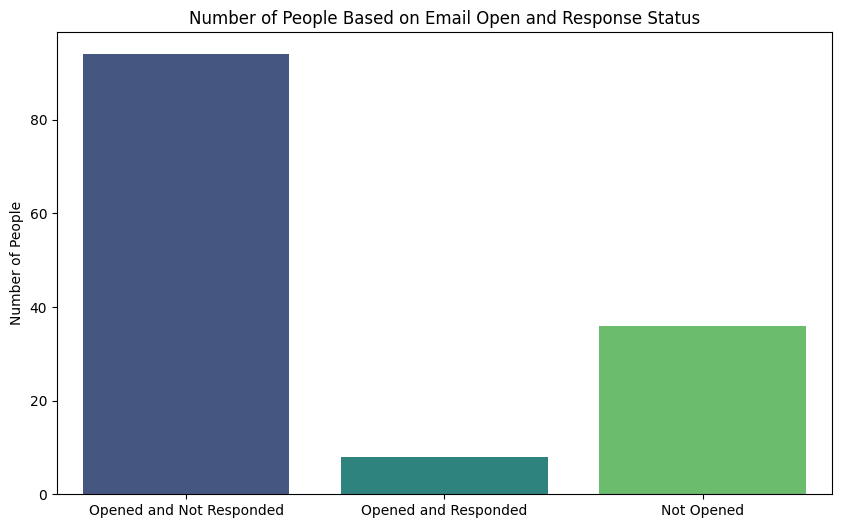

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only relevant data
opened_not_responded = final_df[(final_df['opened'] == 1) & (final_df['responded'] == 0)]
opened_and_responded = final_df[(final_df['opened'] == 1) & (final_df['responded'] == 1)]
not_opened = final_df[final_df['opened'] == 0]

# Counting the occurrences for each combination of 'opened' and 'responded'
count_data = pd.DataFrame({
    'Group': ['Opened and Not Responded', 'Opened and Responded', 'Not Opened'],
    'Count': [len(opened_not_responded), len(opened_and_responded), len(not_opened)]
})

# bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Count', data=count_data, palette='viridis')
plt.xlabel('')
plt.ylabel('Number of People')
plt.title('Number of People Based on Email Open and Response Status')
plt.show()

###**INFERENCE**
Approximately 100 individuals opened the mail but did not provide a response. <br>On average, 10 people both opened and responded to the mail. <br>Additionally, around 30 to 35 people did not open the mail.



---



## 1.4.2 **E-Mail Length**
To assess the factors influencing email open and response rates, let's examine the email length.

In [17]:
#getting the number of words in every mail's subject
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def length(text):
    return len(word_tokenize(text))
final_df['subject_word_count'] = final_df['subject'].apply(length)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
#getting the number of words in every mail's body
final_df['body_word_count'] = final_df['body'].apply(length)

In [20]:
final_df.head()

,subject,body,opened,meeting link clicked,responded,subject_word_count,body_word_count
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",False,False,False,9,66
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",True,False,False,9,80
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",False,False,False,10,99
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",True,True,False,11,87
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",False,False,False,11,89


#### **Average Word Count (Body & Subject)**

In [34]:
# Calculate the average word count
average_word_countb = final_df['body_word_count'].mean()
average_word_counts = final_df['subject_word_count'].mean()

print(f"Average Word Count (Subject): {average_word_counts:.2f}")
print('')
print(f"Average Word Count (Body): {average_word_countb:.2f}")

Average Word Count (Subject): 8.77

Average Word Count (Body): 76.89


## 1.4.3 **How a Mail's subject influence the Open Rate (KDE Plot)**



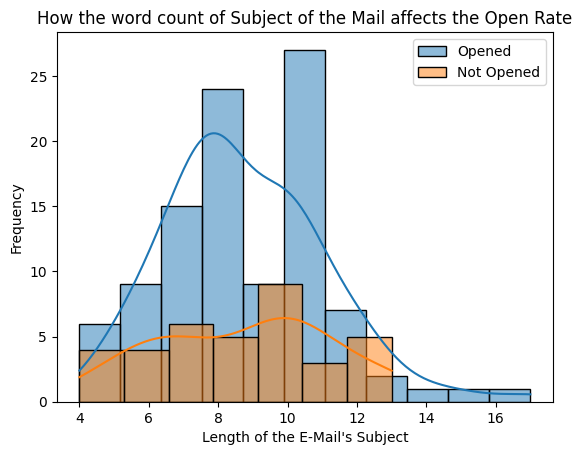

In [31]:
sns.histplot(final_df[final_df['opened'] == 1]['subject_word_count'], label='Opened', kde=True)
sns.histplot(final_df[final_df['opened'] == 0]['subject_word_count'], label='Not Opened', kde=True)
plt.xlabel("Length of the E-Mail's Subject")
plt.ylabel('Frequency')
plt.title('How the word count of Subject of the Mail affects the Open Rate')
plt.legend()
plt.show()

###**INFERENCE**
The analysis indicates that emails with a subject word count ranging from 6 to 12 tend to have higher open rates compared to those with different word counts.

Conversely, an increase in word count appears to be associated with a decrease in email open rates.

## 1.4.4 **How a Mail's subject influence the Reponse Rate (KDE Plot)**


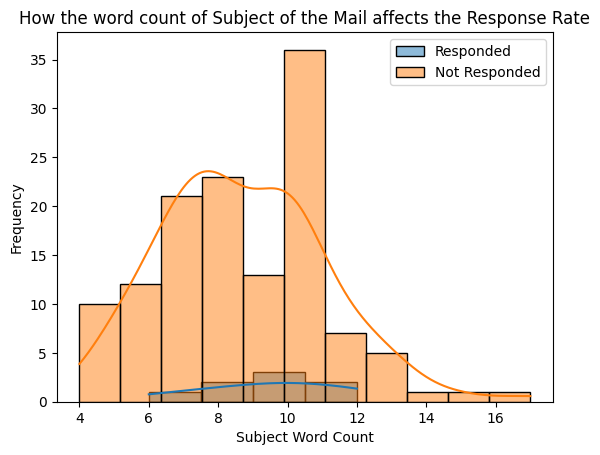

In [30]:
sns.histplot(final_df[final_df['responded'] == 1]['subject_word_count'], label='Responded', kde=True)
sns.histplot(final_df[final_df['responded'] == 0]['subject_word_count'], label='Not Responded', kde=True)
plt.xlabel('Subject Word Count')
plt.ylabel('Frequency')
plt.title('How the word count of Subject of the Mail affects the Response Rate')
plt.legend()
plt.show()

###**INFERENCE**
The findings suggest that a significant portion of emails with subject word counts between 7 and 11 did not receive any responses.

Conversely, emails with subject word counts in the range of 6 to 12 saw a response from a relatively small number of individuals, typically ranging from 1 to 3 people.







## 1.4.5 **Email Link Engagement based on Open Rates**


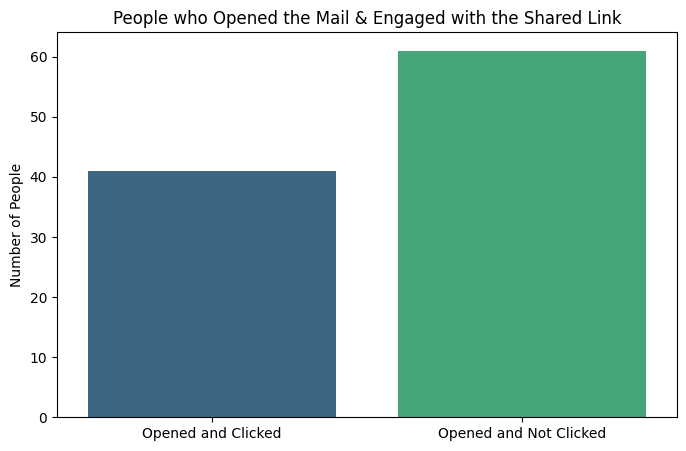

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only relevant data
opened_and_clicked = final_df[(final_df['opened'] == 1) & (final_df['meeting link clicked'] == 1)]
opened_and_not_clicked = final_df[(final_df['opened'] == 1) & (final_df['meeting link clicked'] == 0)]

# Count the occurrences for each combination of 'opened' and 'meeting link clicked'
count_data = pd.DataFrame({
    'Group': ['Opened and Clicked', 'Opened and Not Clicked'],
    'Count': [len(opened_and_clicked), len(opened_and_not_clicked)]
})

# Plot a grouped bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Group', y='Count', data=count_data, palette='viridis')
plt.xlabel('')
plt.ylabel('Number of People')
plt.title('People who Opened the Mail & Engaged with the Shared Link')
plt.show()


### **INFERENCE**
Our of the people who opened the e-mail, only 40 of them engaged with the link

## 1.4.6 **Most Frequent Words Used in the Email's Subject & Body**

#### <u>1.4.6.1 SUBJECT



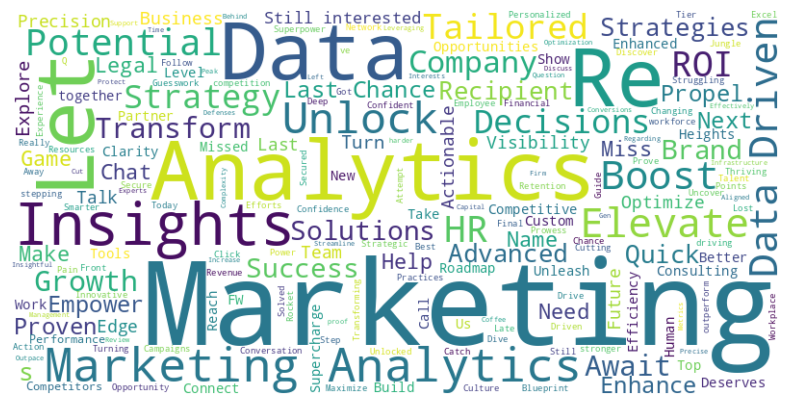

In [41]:
# Combine all text in the 'subject' column into a single string
subject_text = ' '.join(final_df['subject'].astype(str))

# Generate a word cloud for the subject
subject_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(subject_text)

# Plot the subject word cloud
plt.figure(figsize=(10, 5))
plt.imshow(subject_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### <U>1.4.6.2 BODY

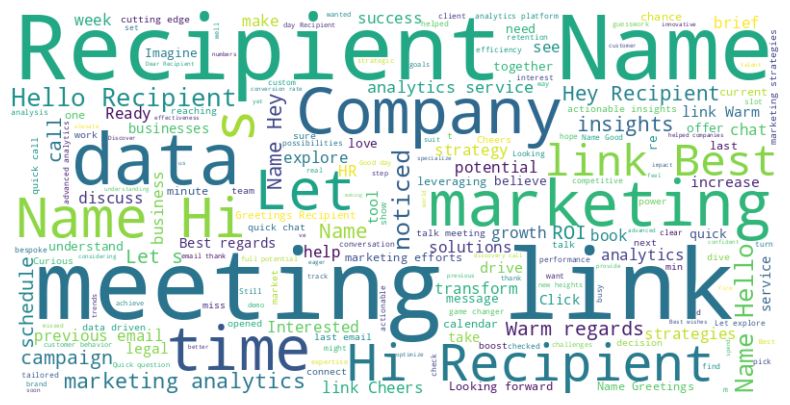

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text in the 'body' column into a single string
body_text = ' '.join(final_df['body'].astype(str))

# Generate a word cloud for the body
body_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(body_text)

# Plot the body word cloud
plt.figure(figsize=(10, 5))
plt.imshow(body_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###**INFERENCE**
Larger words in the word cloud represent words that appear more frequently in the email bodies & subjects, this overall lets us know the relation between the mail open rate based on the mail's contents

# 1.5 <u>**MODEL CREATION**</u>

Since this is a binary classification tasks, i.e. predicting email engagement (open rates or link clicks), the choice of the "best" model depends on various factors such as the size of the dataset, the complexity of the relationships, and specific performance metrics.


 - Here, I'll be using a Random Forest Classifier, since it uses the ensemble learning method (that builds multiple decision trees and merges their predictions) & is also overall a versatile model handling complexity & non-linear relationships

In [ ]:
# The data was already preprocessed in the earlier steps
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

# Combining 'subject' and 'body' into a single text feature
final_df['combined_text'] = final_df['subject'] + ' ' + final_df['body']

# Define features (X) and target variables (y)
X = final_df['combined_text']
y_opened = final_df['opened']
y_link_clicked = final_df['meeting link clicked']
y_responded = final_df['responded']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train_opened, y_test_opened, y_train_link_clicked, y_test_link_clicked, y_train_responded, y_test_responded = train_test_split(
    X, y_opened, y_link_clicked, y_responded, test_size=0.2, random_state=42
)

# Convert boolean target & test variables are of the type 'object', converting it to integer now
y_train_opened = y_train_opened.astype(int)
y_train_link_clicked = y_train_link_clicked.astype(int)
y_train_responded = y_train_responded.astype(int)

y_test_opened = y_test_opened.astype(int)
y_test_link_clicked = y_test_link_clicked.astype(int)
y_test_responded = y_test_responded.astype(int)

In [47]:
# Initialize the Random Forest Classifier
rf_model_opened = make_pipeline(CountVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))
rf_model_link_clicked = make_pipeline(CountVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))
rf_model_responded = make_pipeline(CountVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))

# Training
rf_model_opened.fit(X_train, y_train_opened)
rf_model_link_clicked.fit(X_train, y_train_link_clicked)
rf_model_responded.fit(X_train, y_train_responded)

# Making predictions on the testing set
y_pred_opened = rf_model_opened.predict(X_test)
y_pred_link_clicked = rf_model_link_clicked.predict(X_test)
y_pred_responded = rf_model_responded.predict(X_test)

# Evaluate the models
accuracy_opened = accuracy_score(y_test_opened, y_pred_opened)
accuracy_link_clicked = accuracy_score(y_test_link_clicked, y_pred_link_clicked)
accuracy_responded = accuracy_score(y_test_responded, y_pred_responded)

# Print the evaluation metrics
print("Opened Prediction:")
print(f"Accuracy: {accuracy_opened:.2f}")
print("\nLink Clicked Prediction:")
print(f"Accuracy: {accuracy_link_clicked:.2f}")
print("\nResponded Prediction:")
print(f"Accuracy: {accuracy_responded:.2f}")

Opened Prediction:
Accuracy: 0.68

Link Clicked Prediction:
Accuracy: 0.75

Responded Prediction:
Accuracy: 0.96


## <u>**EVALUATION**</u>

1. **Opened Prediction (Accuracy: 0.68)**:

The model predicts whether an email was opened with an accuracy of approximately 68% on the test set.
This means that the model correctly classified whether an email was opened or not about 68% of the time.

2. **Link Clicked Prediction (Accuracy: 0.75)**:

The model correctly classified whether a link was clicked or not about 75% of the time.

3. **Responded Prediction (Accuracy: 0.96)**:

The model predicts whether the recipient responded to the email with an accuracy of approximately 96% on the test set.
This indicates a high level of accuracy, suggesting that the model is performing well in predicting email responses.



---



# 1.6 <u>**MODEL IMPROVEMENT (HYPERPARAMETER TUNING)**</u>

Making use of Text Vectorization technique (specifically TfidVectorizer) for a different reperesenation of text features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

# Update the pipeline to use TfidfVectorizer
rf_model_opened_tfidf = make_pipeline(TfidfVectorizer(), RandomForestClassifier(random_state=42))
rf_model_link_clicked_tfidf = make_pipeline(TfidfVectorizer(), RandomForestClassifier(random_state=42))
rf_model_responded_tfidf = make_pipeline(TfidfVectorizer(), RandomForestClassifier(random_state=42))

# Defining hyperparameter grid for grid search
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'tfidfvectorizer__max_features': [500, 1000, 2000]
}

# Perform grid search for each model
grid_search_opened = GridSearchCV(rf_model_opened_tfidf, param_grid, cv=3, scoring='accuracy')
grid_search_link_clicked = GridSearchCV(rf_model_link_clicked_tfidf, param_grid, cv=3, scoring='accuracy')
grid_search_responded = GridSearchCV(rf_model_responded_tfidf, param_grid, cv=3, scoring='accuracy')

In [48]:
# Train the models with the best hyperparameters
grid_search_opened.fit(X_train, y_train_opened)
grid_search_link_clicked.fit(X_train, y_train_link_clicked)
grid_search_responded.fit(X_train, y_train_responded)

# Make predictions on the testing set
y_pred_opened_tuned = grid_search_opened.predict(X_test)
y_pred_link_clicked_tuned = grid_search_link_clicked.predict(X_test)
y_pred_responded_tuned = grid_search_responded.predict(X_test)

# Evaluate the tuned models
accuracy_opened_tuned = accuracy_score(y_test_opened, y_pred_opened_tuned)
accuracy_link_clicked_tuned = accuracy_score(y_test_link_clicked, y_pred_link_clicked_tuned)
accuracy_responded_tuned = accuracy_score(y_test_responded, y_pred_responded_tuned)

# Print the tuned model evaluation metrics
print("Tuned Opened Prediction:")
print(f"Accuracy: {accuracy_opened_tuned:.2f}")

print("\nTuned Link Clicked Prediction:")
print(f"Accuracy: {accuracy_link_clicked_tuned:.2f}")

print("\nTuned Responded Prediction:")
print(f"Accuracy: {accuracy_responded_tuned:.2f}")


Tuned Opened Prediction:
Accuracy: 0.68

Tuned Link Clicked Prediction:
Accuracy: 0.75

Tuned Responded Prediction:
Accuracy: 0.96


## <u>**EVALUATION**</u>
The tuned model is providing similar results to the original models, it could be due to a few reasons including Limited Tuning Space: The hyperparameter grid used for tuning might not cover a wide enough range of values, (After trying different hyperparameter grid values, the prediction accuracy remained the same)



---



# 1.7 <u>**MODEL IMPROVEMENT (FEATURE ENGINEERING)**</u>
Here, i introduced features like text length, the number of uppercase characters in the subject, and sentiment analysis scores for both subject and body.

In [ ]:
from sklearn.pipeline import make_pipeline
from textblob import TextBlob

# Feature Engineering
final_df['text_length'] = final_df['combined_text'].apply(len)
final_df['subject_caps'] = final_df['subject'].apply(lambda x: sum(1 for c in x if c.isupper()))

# Sentiment Analysis
final_df['subject_sentiment'] = final_df['subject'].apply(lambda x: TextBlob(x).sentiment.polarity)
final_df['body_sentiment'] = final_df['body'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Define features (X) and target variables (y)
X = final_df[['text_length', 'subject_caps', 'subject_sentiment', 'body_sentiment']]
y_opened = final_df['opened']
y_link_clicked = final_df['meeting link clicked']
y_responded = final_df['responded']


In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train_opened, y_test_opened, y_train_link_clicked, y_test_link_clicked, y_train_responded, y_test_responded = train_test_split(
    X, y_opened, y_link_clicked, y_responded, test_size=0.2, random_state=42
)
# Convert boolean target variables to integer
y_train_opened = y_train_opened.astype(int)
y_train_link_clicked = y_train_link_clicked.astype(int)
y_train_responded = y_train_responded.astype(int)

# Convert boolean target variables to integer for test sets
y_test_opened = y_test_opened.astype(int)
y_test_link_clicked = y_test_link_clicked.astype(int)
y_test_responded = y_test_responded.astype(int)

# Initialize the Random Forest Classifier
rf_model_opened = RandomForestClassifier(random_state=42)
rf_model_link_clicked = RandomForestClassifier(random_state=42)
rf_model_responded = RandomForestClassifier(random_state=42)

# Train the models
rf_model_opened.fit(X_train, y_train_opened)
rf_model_link_clicked.fit(X_train, y_train_link_clicked)
rf_model_responded.fit(X_train, y_train_responded)

# Make predictions on the testing set
y_pred_opened = rf_model_opened.predict(X_test)
y_pred_link_clicked = rf_model_link_clicked.predict(X_test)
y_pred_responded = rf_model_responded.predict(X_test)

# Evaluate the models
accuracy_opened = accuracy_score(y_test_opened, y_pred_opened)
accuracy_link_clicked = accuracy_score(y_test_link_clicked, y_pred_link_clicked)
accuracy_responded = accuracy_score(y_test_responded, y_pred_responded)

# Print the evaluation metrics
print("Opened Prediction:")
print(f"Accuracy: {accuracy_opened:.2f}")

print("\nLink Clicked Prediction:")
print(f"Accuracy: {accuracy_link_clicked:.2f}")

print("\nResponded Prediction:")
print(f"Accuracy: {accuracy_responded:.2f}")


Opened Prediction:
Accuracy: 0.71

Link Clicked Prediction:
Accuracy: 0.68

Responded Prediction:
Accuracy: 0.96


## <u>**EVALUATION**</u>

 The updated model with additional engineered features has led to a slight improvement in the accuracy of predicting whether an email was opened and a maintained high accuracy for predicting responses. However, the accuracy for predicting link clicks seems to have decreased slightly.


1. **Opened Prediction (Accuracy: 0.71):**

         The model's accuracy in predicting whether an email was opened has improved from the previous model (0.68). It correctly classifies whether an email was opened or not about 71% of the time.

2. **Link Clicked Prediction (Accuracy: 0.68):**

          The accuracy for predicting link clicks has decreased slightly compared to the previous model (0.75). It correctly classifies whether a link was clicked or not about 68% of the time.

3. **Responded Prediction (Accuracy: 0.96):**

          The accuracy for predicting responses remains high at approximately 96%.


---------------
The model continues to perform exceptionally well in predicting whether a recipient responded to the email.
While accuracy is a valuable metric, it's also better to not always completely rely on accuracy.


In [51]:
precision_opened = precision_score(y_test_opened, y_pred_opened)
recall_opened = recall_score(y_test_opened, y_pred_opened)

precision_link_clicked = precision_score(y_test_link_clicked, y_pred_link_clicked)
recall_link_clicked = recall_score(y_test_link_clicked, y_pred_link_clicked)

precision_responded = precision_score(y_test_responded, y_pred_responded)
recall_responded = recall_score(y_test_responded, y_pred_responded)

# Print the evaluation metrics
print("Opened Prediction:")
print(f"Precision: {precision_opened:.2f}")
print(f"Recall: {recall_opened:.2f}")

print("\nLink Clicked Prediction:")
print(f"Precision: {precision_link_clicked:.2f}")
print(f"Recall: {recall_link_clicked:.2f}")

print("\nResponded Prediction:")
print(f"Precision: {precision_responded:.2f}")
print(f"Recall: {recall_responded:.2f}")


Opened Prediction:
Precision: 0.74
Recall: 0.89

Link Clicked Prediction:
Precision: 0.33
Recall: 0.29

Responded Prediction:
Precision: 0.00
Recall: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



## <u> **EVALUATION** </u>

1. Opened Prediction:

          Precision: 0.74 - This means that among the instances predicted as "opened," about 74% were correct.
          Recall: 0.89 - This indicates that the model captured about 89% of the actual instances of "opened."

2. Link Clicked Prediction:

         Precision: 0.33 - Only 33% of the instances predicted as "link clicked" were correct.
         Recall: 0.29 - The model captured about 29% of the actual instances of "link clicked."

3. Responded Prediction:

        Precision: 0.00 - Precision is ill-defined because there are no predicted samples for "responded." The model did not predict any positive instances for "responded."
        Recall: 0.00 - Similarly, recall is also ill-defined due to no predicted samples.


The warning indicates that precision and recall are ill-defined when there are no predicted positive samples. In the case of "responded," it seems the model did not predict any positive instances, leading to the warning. This could be due to a class imbalance or issues with the model's ability to capture positive instances for that specific class.





---



#<u>**SUGGESTIONS**</u>


**Based on the analysis and modeling performed on the email engagement data, here are some actionable insights for improving email engagement:**

<br>

1. **Subject Word Count Influence:**

The analysis suggests that emails with subject word counts between 6-12 have higher open rates. Consider crafting concise and engaging subject lines within this word count range to capture recipients' attention.

2. **Email Length:**

Monitor the length of your emails. The analysis shows that bigger email length tends to have lower open & response rates. Thus, ensure that the body of the email provides valuable content without being too lengthy.

3. **Link Clicks and Responses:**

The analysis indicates that the number of people who opened the email but didn't respond is substantial. Thus, Exploring ways to increase the conversion from opens to responses. This might involve clearer calls to action or personalized content that encourages recipients to engage further.

4. **Subject and Body Content:**

Analyze the most frequently used words in both the subject and body of emails. Ensure that these words align with the brand messaging and resonate with the audience. A word cloud visualization can help / helped identify common themes and topics.

5. **Feature Importance:**

Investigating the features of the data & models is of outmost importance, especially for predicting opens and link clicks. Identify which features have the most impact on engagement and tailor your content or targeting strategy accordingly.

6. **Class Imbalance:**

Addressing any class imbalance in data is crucial. If certain engagement categories are underrepresented, it might be challenging for the model to predict them accurately.

7. **Personalization:**

Leveraging personalization in the email content to the preferences and behaviors of individual recipients can help to have higher engagement rates.

8. **Continuous Monitoring:**

Email engagement patterns can change over time. Continuously monitor the performance of your emails and adapt strategies based on evolving recipient behaviors and preferences.